In [1]:
# 1. 라이브러리 임포트 & 데이터 불러오기

# pandas : 데이터 분석 라이브러리
import pandas as pd
# numpy : 수치 계산 라이브러리
import numpy as np
# matplotlib : 시각화 라이브러리
# 'plot' 함수는 Matplotlib의 서브모듈 'pyplot'에 있습니다. 따라서 올바른 import 문은 다음과 같습니다:
import matplotlib.pyplot as plt
# seaborn : 데이터 시각화 라이브러리
import seaborn as sns


# seaborn 시각화 스타일 지정 
sns.set_style('whitegrid')

# 데이터 불러오기 (폴더에서 불러오는 방법)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# kaggle에 올라온 코드로 파일 불러오는 방법 (다음에 적용해 보고싶음)
# for dirname, _, filenames in os.walk('/home/iujeong/titanic/train.csv'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# train 데이터 확인
# train.shape : 행과 열의 개수 확인
# train.head() : 상위 5개의 행을 미리보기
print("Train shape : ", train.shape)
train.head()

Train shape :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 2. 데이터 구조 파악 & 기본 통계

# info()로 결측치 및 데이터 타입 확인
# 결측치 : 데이터에서 특정 정보가 누락된 것
# info() : 각 컬럼의 데이터타입(object, int, float 등)과 결측지(null) 수 확인
train.info()

# describe()로 기초 통계량
# describe() : 수치형 열에 대한 기초 통계 (평균, 표준편차, 최솟값, 최댓값 등)
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


총 행 개수 891, 총 컬럼 갯수 12개  

💡 주요 관찰 포인트 :  

dtypes: float64(2), int64(5), object(5)  

1️⃣ float64(실수형 데이터) : Age(나이), Fare(티켓 가격)  
2️⃣ int64(정수형 데이터) : PassengerId(승객별 고유 ID번호), Survived(생존 여부), Pclass(좌석 등급), SibSp(형제자매/배우자 수), Parch(부모/자식 수)  
3️⃣ object(문자열 데이터) : Name(이름), Sex(성별), Ticket(티켓 번호), Cabin(객실 번호), Embarked(승선한 항구)  

Age(나이)와 Cabin(객실 번호)에 결측치(데이터가 누락됨)가 많음 -> 왜??  

** 나이 (891개 중에 714개만 있음, 177개의 결측치)  
... 아마도 그 당시엔 신분증이 보편화 되지 않았을 가능성  
... 구조된 사람들의 나이가 정확하게 기록되었을 가능성  
... 사망한 사람들의 신원 확인이 어려움

** 객실 번호 (891개 중 204개만 존재, 687개의 결측치)  
... 그때는 손으로 다 기록 했을텐데 침몰하면서 그 기록을 찾기 어렵지 않았을까  
... 타이타닉 영화만 봐도 잭은 제대로된 티켓도 없이 탔던거 같은데(아닐수도)  
... 고로 그 당시에 1, 2등급 티켓을 제외하곤 알기 힘들었을듯  

** 승선한 항구 (891개 중 889개 존재, 2개의 결측치)  
... 생각보다 결측치가 적음  
... 기록 잘 했는가봄  

-----------------------------------   

count(데이터 갯수)  
mean(평균)  
std(표준편차, 데이터가 평균에서 얼마나 퍼져 있는지)  
min(최소값)  
25% - ?????  


참고 : https://qkrrmsdud.tistory.com/8

In [3]:
# 3. 탐색적 데이터 분석 (EDA)

# 3-1. 결측치(Missing Value) 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

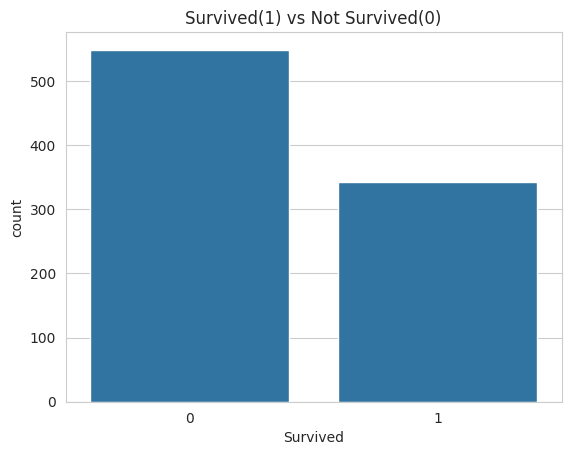

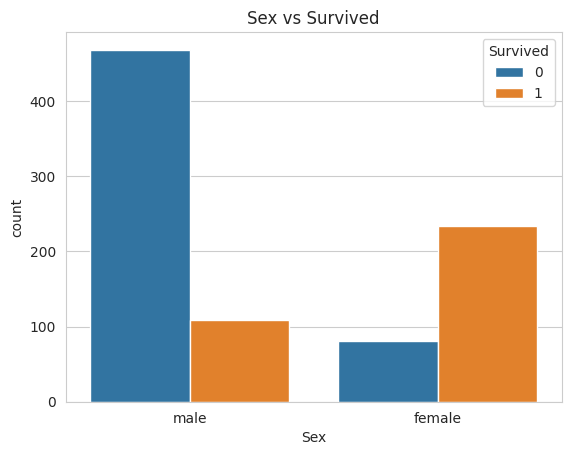

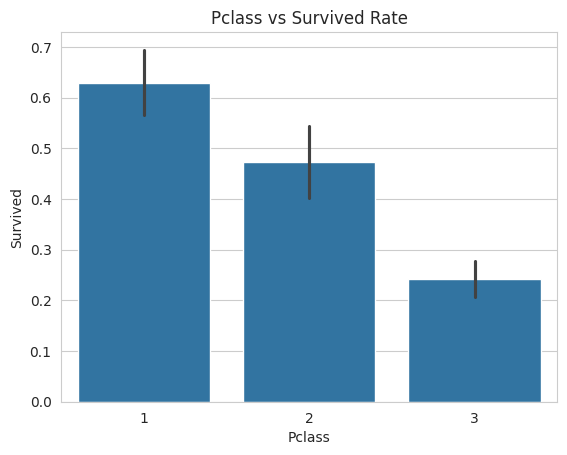

In [4]:
# 3-2. 간단한 시각화 (생존여부 분포, 성별, 객실등급 등)

# 생존 여부 카운트
sns.countplot(data=train, x='Survived')
plt.title("Survived(1) vs Not Survived(0)")
plt.show()

# 성별 vs 생존여부
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Sex vs Survived")
plt.show()

# 객실 등급 vs 생존율
sns.barplot(data=train, x='Pclass', y='Survived')
plt.title("Pclass vs Survived Rate")
plt.show()

sns = seaborn  
sns.countplot : 범주형 변수가 몇 개씩 있는지 막대그래프로 표시  
sns.barplot : 평균값(or비율)을 막대그래프로 시각화할 때 유용  
  
결과 해석 예시 :  
- 성별 그래프에서 여성 생존자가 남성보다 훨씬 많다.  
- 객실 등급이 높을수록 생존율이 높은 경향 (1등실 > 3등실)  

In [5]:
# 4. 결측치 처리 & 간단한 데이터 전처리

# 4-1. Age 결측치 처리

# (방법 1) Age를 평균값으로 대체
mean_age = train['Age'].mean()
train['Age'].fillna(mean_age, inplace=True)
test['Age'].fillna(mean_age, inplace=True)

/tmp/ipykernel_3263252/1132359329.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(mean_age, inplace=True)
/tmp/ipykernel_3263252/1132359329.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [6]:
# 4-2. Cabin 처리

# Cabin은 데이터가 너무 부족하므로, "Cabin 여부"로만 사용 예시
train['CabinYN'] = train['Cabin'].notnull().astype(int)
test['CabinYN'] = test['Cabin'].notnull().astype(int)

# 원래 Cabin 컬럼은 제외(혹은 남겨둬도 됨)
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace=True)

In [7]:
# 4-3. Embarked 결측치 처리

# Embarked의 최빈값(가장 자주 등장하는 항구) 찾기
most_common_embarked = train['Embarked'].value_counts().idxmax()
print("Most Common Embarked =", most_common_embarked)  # 보통 'S'

# 결측치 대체
train['Embarked'].fillna(most_common_embarked, inplace=True)
test['Embarked'].fillna(most_common_embarked, inplace=True)

Most Common Embarked = S


/tmp/ipykernel_3263252/1957665734.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(most_common_embarked, inplace=True)
/tmp/ipykernel_3263252/1957665734.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [8]:
# 5. 범주형 변수 처리 (인코딩)
# 문자열(Sex, Embarked)을 머신러닝 모델이 이해할 수 있는 숫자로 변환

# Sex: male, female -> 0,1
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex']  = test['Sex'].map({'male':0, 'female':1})

# Embarked: One-Hot Encoding
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test  = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,CabinYN,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,False,True


map() : 남/녀를 0,1로 바꾸는 간단한 숫자 변환  
pd.get_dummies() : 문자열 범주형을 원핫인코딩  
    drop_first=True -> 더미 변수가 하나 너무 많을 수 있으므로 하나 드롭

In [9]:
# 6. 간단한 통계 분석 (성별, 객실 등급별 생존율 차이)

# (1) 성별에 따른 생존율
print(train.groupby('Sex')['Survived'].mean())

# (2) 객실 등급에 따른 생존율
print(train.groupby('Pclass')['Survived'].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


결과 해석 :  
여성 (Sex=1) 생존율이 남성 (Sex=0) 보다 훨씬 높음  
1등실이 3등실보다 생존율 높음   
(추가로 카이제곱 검정, t-test등을 해볼 수도 있음. 코드 예시는 생략.)  

** 카이제곱 검정 (Chi-Squared Test) ?  
카이제곱 검정은 두 범주ㅕㅇ 변수에 대한 분석 방법.   

적합도 검정 (Goodness of Fit) : 한 범주형 변수의 각 그룹 별 비율과 특정 상수비가 같은지 검정하는 적합도 검정  
동질성 검정 (Test of Homogeneity) : 각 집단이 서로 유사한 성향을 갖는지 분석하는 동질성 검정   
독립성 검정 (Test of Independence) : 두 범주형 변수가 서로 독립인지 검정하는 독립성 검정  

|유형|변수 수|예시|특징|
|------|-----|---|---|
|적합도 검정|1|교배 실험으로 얻은 완두콩 비율이 멘델의 법칙 9:3:3:1을 따르는지 검정|기존에 알려진 기준이 존재|
|동질성 검정|2|성별에 따라 음료 선호가 유형 다른지 검정|동질성 검정은 행 변수를 고정|
|독립성 검정|2|성별과 전공 선택이 서로 관계가 있는지 검정|독립성 검저은 전체 표본수(N)를 고정|



In [10]:
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0  35.000000      0   
..                                                 ...  .

In [11]:
# 7. 머신러닝 모델링 (분류)
# 7-1. Feature(독립변수) / Target(종속변수) 분리

# 모델에 사용할 컬럼(특징) 선정 예시
# 'Survived'는 빼고, 'PassengerId', 'Name', 'Ticket' 등은 일단 제외
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinYN',
            'Embarked_Q', 'Embarked_S']     # 원핫인코딩된 컬럼들

X = train[features]
y = train["Survived"]

오류 날때는 메세지 잘 읽어보고 재시작 눌러보기.

In [12]:
# 7-2. 학습 데이터/검증 데이터 분할
from sklearn.model_selection import train_test_split

# 80% : 학습, 20% : 검증
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42)
print(X_train.shape, X_val.shape)

(712, 9) (179, 9)


In [13]:
# 7-3. 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, class_likelihood_ratios

# 1) 모델 생성 & 학습
log_model = LogisticRegression(max_iter=200)    # 데이터에 따라 max_iter 조정
log_model.fit(X_train, y_train)

# 2) 예측
y_pred_log = log_model.predict(X_val)

# 3) 평가 지표
acc_log = accuracy_score(y_val, y_pred_log)
print("Logistic Regression Accuracy = ", acc_log)

cm_log = confusion_matrix(y_val, y_pred_log)
print("Confusion Matrix : \n", cm_log)

print("Classification Report : \n", class_likelihood_ratios(y_val, y_pred_log))

Logistic Regression Accuracy =  0.8212290502793296
Confusion Matrix : 
 [[91 14]
 [18 56]]
Classification Report : 
 (np.float64(5.675675675675675), np.float64(0.2806652806652807))


<spen style="color:orange"> max_iter=200 </spen>: 기본(100)으로 부족할  수 있어 늘려줌   
<spen style="color:orange"> accuracy_score </spen>: 정확도  
<spen style="color:orange"> confusion_matrix </spen>: 혼동 행렬  
<spen style="color:orange"> classification_report </spen>: 정밀도(precision), 재현율(recall), F1-score 등

In [14]:
# 7-4. 랜덤 포레스트 모델

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1) 모델 생성 & 학습
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# 2) 예측
y_pred_rf = rf_model.predict(X_val)

# 3) 평가
acc_rf = accuracy_score(y_val, y_pred_rf)
print("Random Forest Accuracy =", acc_rf)

cm_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

print("Classification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Accuracy = 0.8156424581005587
Confusion Matrix:
 [[91 14]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



RandomForestClassifier : 여러 개의 결정 트리 결합 -> 일반적으로 좋은 성능  
n_estimators : 트리 개수 (보통 100, 200 등)  
max_depth : 트리 깊이 제한 (기본은 None)  

In [15]:
# 7-5. 결과 비교

print("Logistic Regression Accuracy :", acc_log)
print("Random Forest Accuracy       :", acc_rf)

Logistic Regression Accuracy : 0.8212290502793296
Random Forest Accuracy       : 0.8156424581005587
